In [19]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler, Normalizer
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [28]:
data_path = "../Data/2021-ml100marathon-midterm/"
df_train = pd.read_csv(data_path + 'train_data.csv')
df_test = pd.read_csv(data_path + 'test_features.csv')

In [29]:
df_train

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,STABLER FRANK,500000.0,NaN,NaN,NaN,frank.stabler@enron.com,NaN,16514.0,NaN,NaN,...,NaN,356071.0,False,511734.0,NaN,239502.0,NaN,NaN,1112087.0,511734.0
109,BROWN MICHAEL,NaN,NaN,NaN,NaN,michael.brown@enron.com,NaN,49288.0,41.0,13.0,...,NaN,NaN,False,NaN,NaN,NaN,761.0,1486.0,49288.0,NaN
110,PICKERING MARK R,300000.0,NaN,NaN,NaN,mark.pickering@enron.com,28798.0,31653.0,67.0,7.0,...,NaN,NaN,False,NaN,NaN,655037.0,728.0,898.0,1386690.0,28798.0
111,HAUG DAVID L,NaN,NaN,NaN,NaN,david.haug@enron.com,NaN,475.0,19.0,4.0,...,NaN,NaN,False,2217299.0,NaN,NaN,471.0,573.0,475.0,2217299.0


In [30]:
df_test

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,...,NaN,NaN,210698.0,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0
1,BOWEN JR RAYMOND M,1350000.0,NaN,-833.0,NaN,raymond.bowen@enron.com,NaN,65907.0,27.0,140.0,...,NaN,974293.0,1621.0,252055.0,NaN,278601.0,1593.0,1858.0,2669589.0,252055.0
2,HANNON KEVIN P,1500000.0,NaN,-3117011.0,NaN,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,...,NaN,1617011.0,11350.0,853064.0,NaN,243293.0,1035.0,1045.0,288682.0,6391065.0
3,DELAINEY DAVID W,3000000.0,NaN,NaN,NaN,david.delainey@enron.com,2291113.0,86174.0,3069.0,66.0,...,NaN,1294981.0,1661.0,1323148.0,NaN,365163.0,2097.0,3093.0,4747979.0,3614261.0
4,CAUSEY RICHARD A,1000000.0,NaN,-235000.0,NaN,richard.causey@enron.com,NaN,30674.0,49.0,58.0,...,NaN,350000.0,307895.0,2502063.0,NaN,415189.0,1585.0,1892.0,1868758.0,2502063.0
5,HICKERSON GARY J,1700000.0,NaN,NaN,NaN,gary.hickerson@enron.com,NaN,98849.0,27.0,40.0,...,NaN,69223.0,1936.0,441096.0,NaN,211788.0,900.0,1320.0,2081796.0,441096.0
6,FREVERT MARK A,2000000.0,6426990.0,-3367011.0,NaN,mark.frevert@enron.com,10433518.0,86987.0,21.0,242.0,...,2000000.0,1617011.0,7427621.0,4188667.0,NaN,1060932.0,2979.0,3275.0,17252530.0,14622185.0
7,CHAN RONNIE,NaN,NaN,-98784.0,98784.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,32460.0,-32460.0,NaN,NaN,NaN,NaN,NaN
8,DONAHUE JR JEFFREY M,800000.0,NaN,-300000.0,NaN,jeff.donahue@enron.com,765920.0,96268.0,22.0,188.0,...,NaN,NaN,891.0,315068.0,NaN,278601.0,772.0,865.0,875760.0,1080988.0
9,REYNOLDS LAWRENCE,100000.0,51365.0,-200000.0,NaN,NaN,4160672.0,8409.0,NaN,NaN,...,NaN,156250.0,202052.0,201483.0,-140264.0,76399.0,NaN,NaN,394475.0,4221891.0


In [31]:
#相關性分析
df_train.corr().loc['poi',:].sort_values(ascending=False)


loan_advances                1.000000
poi                          1.000000
exercised_stock_options      0.591972
total_stock_value            0.443098
salary                       0.371917
total_payments               0.271335
restricted_stock             0.261102
bonus                        0.242170
long_term_incentive          0.227805
other                        0.225619
expenses                     0.136386
from_poi_to_this_person      0.127932
shared_receipt_with_poi      0.120467
to_messages                 -0.023047
from_this_person_to_poi     -0.096864
from_messages               -0.126760
deferred_income             -0.224654
deferral_payments           -0.251548
director_fees                     NaN
restricted_stock_deferred         NaN
Name: poi, dtype: float64

In [32]:
#統計性描述
df_train.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,6.100000e+01,2.800000e+01,3.400000e+01,13.000000,8.100000e+01,73.000000,65.000000,65.000000,65.000000,2.000000e+00,4.900000e+01,6.900000e+01,8.200000e+01,10.000000,7.300000e+01,65.000000,65.000000,9.600000e+01,9.800000e+01
mean,1.147436e+06,6.344374e+05,-4.625664e+05,89397.846154,2.985081e+06,51040.547945,711.323077,64.800000,40.092308,4.096250e+07,7.926171e+05,4.471774e+05,1.294855e+06,-221885.700000,2.739025e+05,1111.369231,2156.061538,2.590977e+06,3.527136e+06
std,1.505189e+06,8.603646e+05,8.095392e+05,41143.391399,6.004174e+06,47596.682104,2074.497628,91.863214,88.901407,5.736404e+07,9.504645e+05,1.341564e+06,2.498335e+06,205191.374121,1.716647e+05,1165.852016,2811.676718,1.056645e+07,7.182997e+06
min,7.000000e+04,-1.025000e+05,-3.504386e+06,3285.000000,3.285000e+03,148.000000,12.000000,0.000000,0.000000,4.000000e+05,7.102300e+04,2.000000e+00,4.409300e+04,-560222.000000,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.500000e+05,7.656750e+04,-5.527032e+05,101250.000000,4.004780e+05,18834.000000,19.000000,10.000000,0.000000,2.068125e+07,2.750000e+05,9.720000e+02,2.689220e+05,-389621.750000,2.061210e+05,178.000000,517.000000,3.024025e+05,4.211518e+05
50%,7.500000e+05,1.951900e+05,-1.175340e+05,108579.000000,8.500100e+05,41953.000000,45.000000,28.000000,7.000000,4.096250e+07,4.221580e+05,5.238200e+04,4.628225e+05,-139856.500000,2.516540e+05,599.000000,1088.000000,1.106740e+06,9.979710e+05
75%,1.000000e+06,8.342052e+05,-2.708325e+04,112492.000000,2.165172e+06,59175.000000,215.000000,88.000000,27.000000,6.124375e+07,8.318090e+05,3.620960e+05,9.664905e+05,-77953.250000,2.885890e+05,1902.000000,2649.000000,1.985668e+06,2.493616e+06
max,8.000000e+06,2.964506e+06,-1.042000e+03,125034.000000,3.434838e+07,228763.000000,14368.000000,528.000000,411.000000,8.152500e+07,5.145434e+06,1.035973e+07,1.476169e+07,44093.000000,1.111258e+06,4527.000000,15149.000000,1.035598e+08,4.911008e+07


In [33]:
# 查看資料型態，及缺失值分布狀況
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       113 non-null    object 
 1   bonus                      61 non-null     float64
 2   deferral_payments          28 non-null     float64
 3   deferred_income            34 non-null     float64
 4   director_fees              13 non-null     float64
 5   email_address              83 non-null     object 
 6   exercised_stock_options    81 non-null     float64
 7   expenses                   73 non-null     float64
 8   from_messages              65 non-null     float64
 9   from_poi_to_this_person    65 non-null     float64
 10  from_this_person_to_poi    65 non-null     float64
 11  loan_advances              2 non-null      float64
 12  long_term_incentive        49 non-null     float64
 13  other                      69 non-null     float64

In [34]:
num_feature = []
for feature in df_train:
    if df_train[feature].dtype == 'float64' :
        num_feature.append(feature)
num_feature

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

array([[<AxesSubplot:title={'center':'bonus'}>,
        <AxesSubplot:title={'center':'deferral_payments'}>,
        <AxesSubplot:title={'center':'deferred_income'}>,
        <AxesSubplot:title={'center':'director_fees'}>,
        <AxesSubplot:title={'center':'exercised_stock_options'}>],
       [<AxesSubplot:title={'center':'expenses'}>,
        <AxesSubplot:title={'center':'from_messages'}>,
        <AxesSubplot:title={'center':'from_poi_to_this_person'}>,
        <AxesSubplot:title={'center':'from_this_person_to_poi'}>,
        <AxesSubplot:title={'center':'loan_advances'}>],
       [<AxesSubplot:title={'center':'long_term_incentive'}>,
        <AxesSubplot:title={'center':'other'}>,
        <AxesSubplot:title={'center':'restricted_stock'}>,
        <AxesSubplot:title={'center':'restricted_stock_deferred'}>,
        <AxesSubplot:title={'center':'salary'}>],
       [<AxesSubplot:title={'center':'shared_receipt_with_poi'}>,
        <AxesSubplot:title={'center':'to_messages'}>,
        

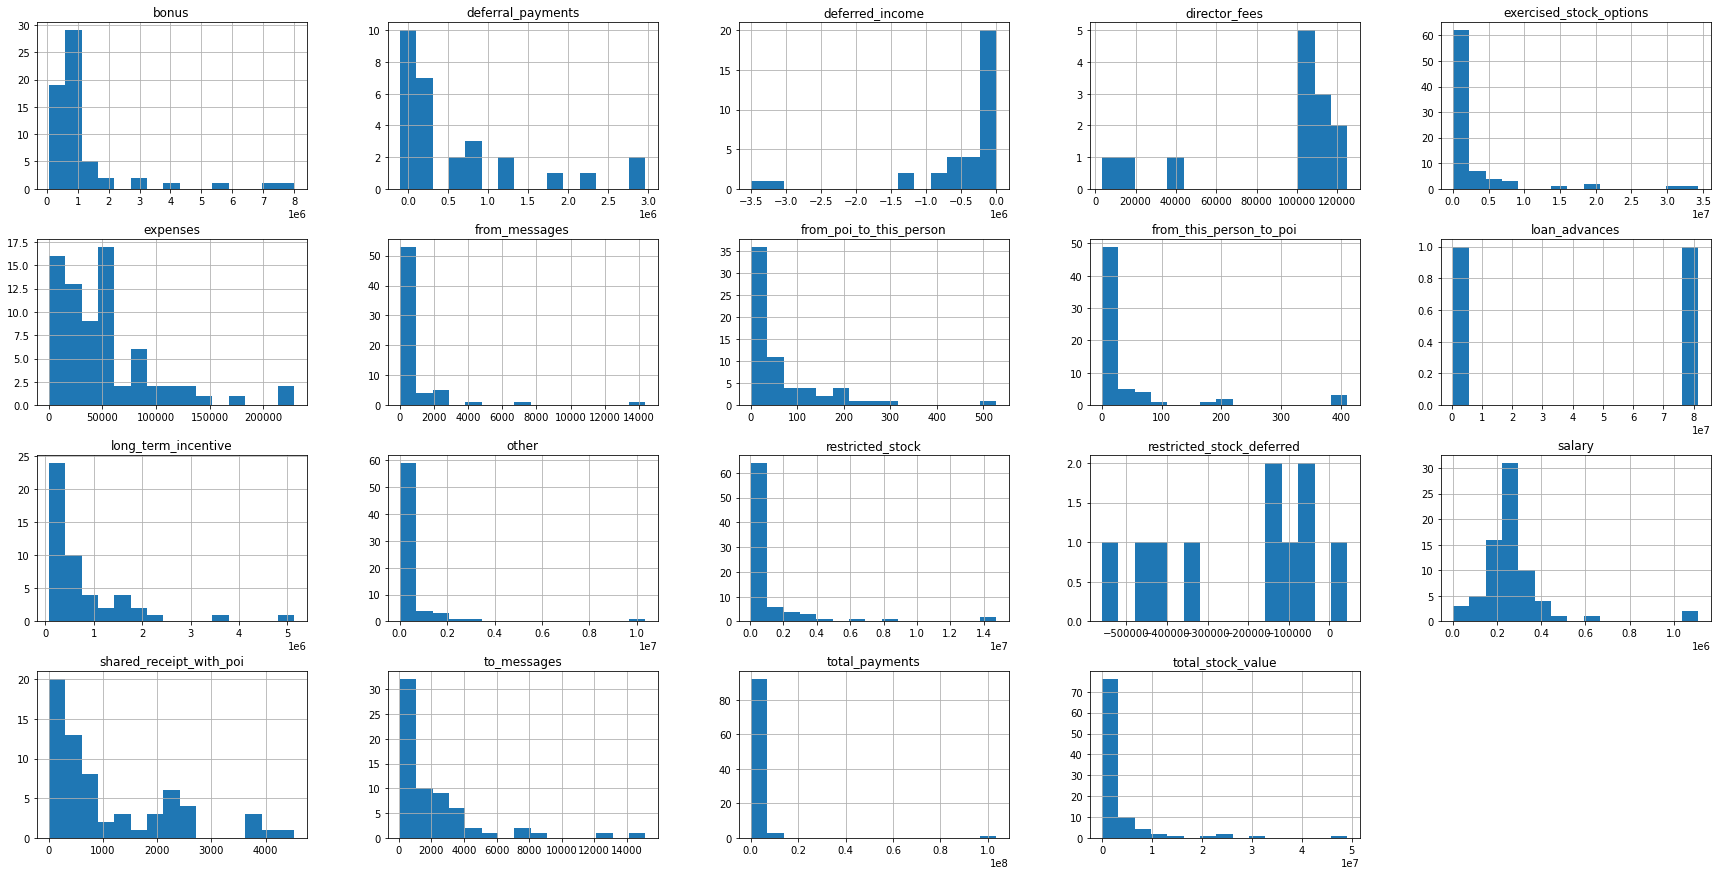

In [35]:
# 各資料欄位視覺化
df_train[num_feature].hist(bins = 15, figsize=(30,15), layout=(4,5))

<AxesSubplot:>

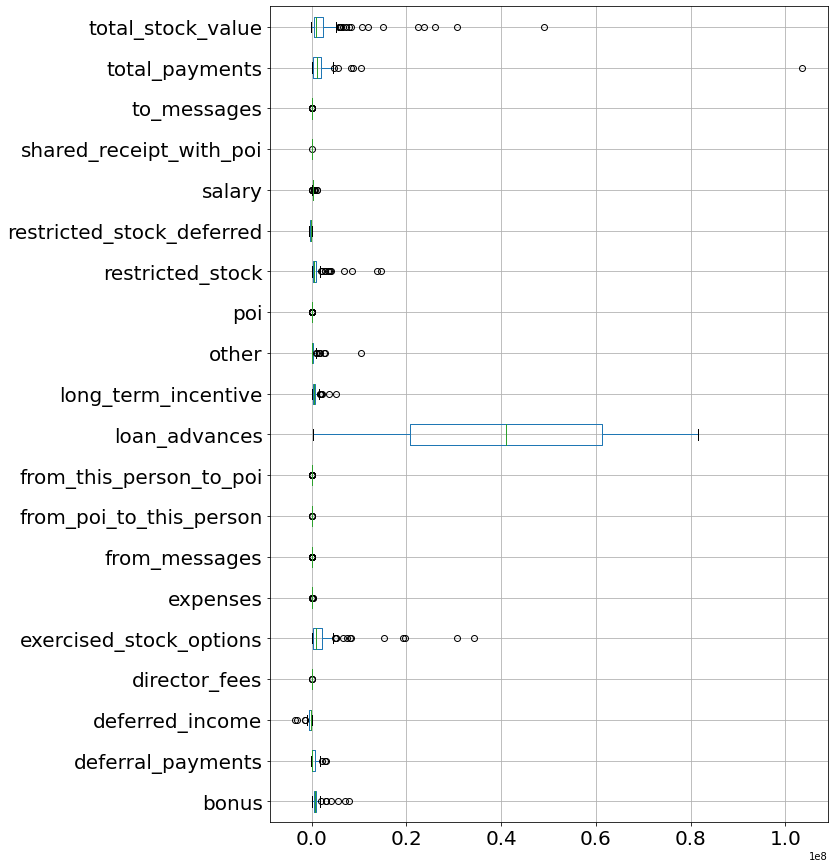

In [72]:
df_train.boxplot(vert=False, figsize=(10,15),fontsize=20)

In [6]:
#資料前處理
df_train[(df_train.name == 'BELFER ROBERT') | (df_train.name  == 'LOCKHART EUGENE E')] # 異常資料


,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
50,BELFER ROBERT,NaN,-102500.0,NaN,3285.0,NaN,3285.0,NaN,NaN,NaN,...,NaN,NaN,False,NaN,44093.0,NaN,NaN,NaN,102500.0,-44093.0
107,LOCKHART EUGENE E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_train.loc[50,['restricted_stock', 'restricted_stock_deferred', 'total_stock_value']] = [44093, -44093, 0]
df_train.drop([107],inplace=True)

In [8]:
train_Y = df_train['poi']
name = df_test['name']
df_train = df_train.drop(['name', 'poi','email_address'] , axis=1)
df_test = df_test.drop(['name', 'email_address'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [9]:
# 檢查 DataFrame 空缺值的狀態
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data.head(10))
na_check(df)

,Missing Ratio
loan_advances,97.241379
director_fees,88.275862
restricted_stock_deferred,87.586207
deferral_payments,73.103448
deferred_income,66.206897
long_term_incentive,54.482759
bonus,43.448276
from_this_person_to_poi,40.689655
from_poi_to_this_person,40.689655
from_messages,40.689655


In [10]:
df.fillna(0, inplace=True)
na_check(df)

,Missing Ratio


In [11]:
#特徵工程
df['total_message'] = df['from_messages'] + df['to_messages']
df['total_message_poi'] = df['from_this_person_to_poi'] + df['from_poi_to_this_person']

df['total_message_poi_from_%'] = df['total_message_poi'] / (df['from_messages'] + 1)
df['total_message_poi_total_%'] = df['total_message_poi'] / (df['total_message'] + 1)

df['from_poi_to_this_person_from_%'] = df['from_poi_to_this_person'] / (df['from_messages'] + 1)
df['from_poi_to_this_person_total_%'] = df['from_poi_to_this_person'] / (df['total_message'] + 1)
df['from_poi_to_this_person_from_poi_%'] = df['from_poi_to_this_person'] / (df['from_messages'] + df['from_poi_to_this_person'] + 1)

df['from_this_person_to_poi_to_%'] = df['from_this_person_to_poi'] / (df['to_messages'] + 1)
df['from_this_person_to_poi_total_%'] = df['from_this_person_to_poi'] / (df['total_message'] + 1)
df['from_this_person_to_poi_to_poi_%'] = df['from_this_person_to_poi'] / (df['to_messages'] + df['from_this_person_to_poi'] + 1)

na_check(df)

,Missing Ratio


In [12]:
#資料標準化
col_name = df.columns
df = StandardScaler().fit_transform(df)
# 將前述轉換完畢資料 df , 重新切成 train_X, test_X
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y,test_size=0.25, random_state=42)

In [13]:
#特徵重要性

# 隨機森林擬合後, 將結果依照重要性由高到低排序
estimator = RandomForestRegressor()
estimator.fit(train_X, train_Y)
# estimator.feature_importances_ 就是模型的特徵重要性, 這邊先與欄位名稱結合起來, 才能看到重要性與欄位名稱的對照表
feats = pd.Series(data=estimator.feature_importances_, index=col_name) # df_train.columns
feats = feats.sort_values(ascending=False)
feats

exercised_stock_options               0.217463
expenses                              0.120701
other                                 0.092855
total_stock_value                     0.072874
bonus                                 0.050879
from_this_person_to_poi_total_%       0.048999
total_message_poi_from_%              0.040585
salary                                0.039663
from_poi_to_this_person_from_poi_%    0.038192
restricted_stock                      0.033023
deferred_income                       0.027996
from_poi_to_this_person_from_%        0.022531
total_message_poi_total_%             0.020909
long_term_incentive                   0.018143
from_messages                         0.018109
from_poi_to_this_person_total_%       0.017132
shared_receipt_with_poi               0.016800
total_payments                        0.015723
from_this_person_to_poi_to_%          0.013238
from_this_person_to_poi               0.012967
to_messages                           0.012918
total_message

In [14]:
#模型評估

# NAIVE BAYES
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train,y_train.values.ravel())
nb_predicted= nb_model.predict(x_test)
nb_prob= nb_model.predict_proba(train_X)[:,1]
print('Naive Bayes',accuracy_score(y_test, nb_predicted))
print('Naive Bayes',cross_val_score(nb_model, train_X, train_Y.values.ravel()).mean())

#KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(x_train,y_train.values.ravel())
knn_predicted= knn_model.predict(x_test)
knn_prob= knn_model.predict_proba(train_X)[:,1]
print('KNN',accuracy_score(y_test, knn_predicted))
print('KNN',cross_val_score(knn_model, train_X, train_Y.values.ravel()).mean())

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators = 100,random_state = 22)
rfc_model.fit(x_train,y_train.values.ravel())
rfc_predicted = rfc_model.predict(x_test)
rfc_prob= rfc_model.predict_proba(train_X)[:,1]
print('Random Forest',accuracy_score(y_test,rfc_predicted))
print('Random Forest',cross_val_score(rfc_model, train_X, train_Y.values.ravel()).mean())

#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0, solver='sag')
lr_model.fit(x_train,y_train.values.ravel())
lr_predicted = lr_model.predict(x_test)
lr_prob= lr_model.predict_proba(train_X)[:,1]
print('Logistic Regression',accuracy_score(y_test, lr_predicted))
print('Logistic Regression',cross_val_score(rfc_model, train_X, train_Y.values.ravel()).mean())

#SVM
from sklearn.svm import SVC

svc_model = SVC(gamma = 'auto', probability=True)
svc_model.fit(x_train,y_train.values.ravel())
svc_predicted = svc_model.predict(x_test)
svc_prob= svc_model.predict_proba(train_X)[:,1]
print('SVM',accuracy_score(y_test, svc_predicted))
print('SVM',cross_val_score(svc_model, train_X, train_Y.values.ravel()).mean())

#DECISION TREE
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier()
dtree_model.fit(x_train,y_train.values.ravel())
dtree_predicted = dtree_model.predict(x_test)
dtree_prob= dtree_model.predict_proba(train_X)[:,1]
print('Decision Tree',accuracy_score(y_test, dtree_predicted))
print('Decision Tree',cross_val_score(dtree_model, train_X, train_Y.values.ravel()).mean())

#XGBOOST
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train,y_train.values.ravel())
xgb_predicted = xgb.predict(x_test)
xgb_prob= xgb.predict_proba(train_X)[:,1]
print('XGBoost',accuracy_score(y_test, xgb_predicted))
print('XGBoost',cross_val_score(xgb, train_X, train_Y.values.ravel()).mean())

Naive Bayes 0.6785714285714286
Naive Bayes 0.6260869565217392
KNN 0.8214285714285714
KNN 0.8845849802371542
Random Forest 0.8214285714285714
Random Forest 0.8928853754940711
Logistic Regression 0.8214285714285714
Logistic Regression 0.8928853754940711
SVM 0.8214285714285714
SVM 0.884189723320158
Decision Tree 0.8214285714285714
Decision Tree 0.7869565217391304
[14:31:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost 0.8214285714285714
[14:31:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old 

In [15]:
meta_estimator = GradientBoostingClassifier(tol=100, subsample=0.75, n_estimators=100, 
                                           max_features='sqrt', max_depth=4, learning_rate=0.3)
stacking = StackingClassifier(classifiers=[knn_model, rfc_model, lr_model, svc_model, dtree_model, xgb], meta_classifier=meta_estimator, use_probas=True, average_probas=False)

[14:24:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

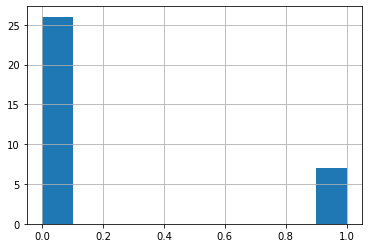

In [16]:
stacking.fit(train_X, train_Y)
stacking_pred = stacking.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': name, 'poi': stacking_pred})
sub.to_csv(data_path + 'stacking.csv', index=False)
sub.poi.hist()

[14:24:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

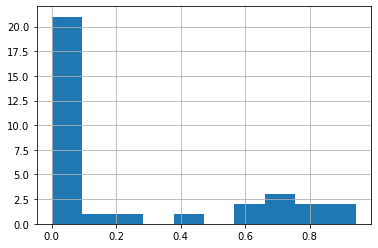

In [17]:
xgb.fit(train_X, train_Y, verbose=True)
xgb_pred = xgb.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': name, 'poi': xgb_pred})
#sub.to_csv(data_path + 'xgb.csv', index=False)
sub.poi.hist()

<AxesSubplot:>

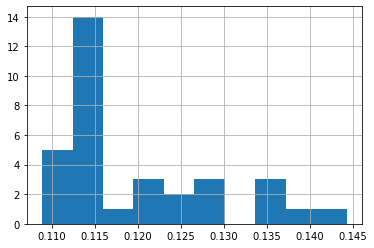

In [18]:
svc_model.fit(train_X, train_Y)
svc_pred = svc_model.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': name, 'poi': svc_pred})
#sub.to_csv(data_path + 'svc_model.csv', index=False)
sub.poi.hist()

<AxesSubplot:>

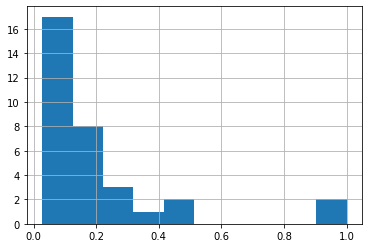

In [19]:
lr_model.fit(train_X, train_Y)
lr_pred = lr_model.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': name, 'poi': lr_pred})
#sub.to_csv(data_path + 'lr_model.csv', index=False)
sub.poi.hist()

<AxesSubplot:>

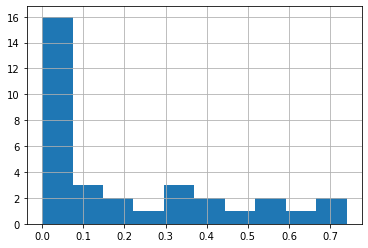

In [16]:
rfc_model.fit(train_X, train_Y)
rfc_pred = rfc_model.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': name, 'poi': rfc_pred})
sub.to_csv(data_path + 'rfc_model.csv', index=False)
sub.poi.hist()

<AxesSubplot:>

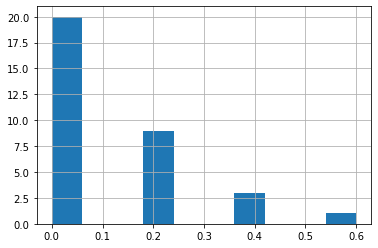

In [21]:
knn_model.fit(train_X, train_Y)
knn_pred = knn_model.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': name, 'poi': knn_pred})
#sub.to_csv(data_path + 'knn_model.csv', index=False)
sub.poi.hist()

In [22]:
def roc_plot(y, y_prob, name=""):
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)

    fig = plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc="best")
    plt.show()

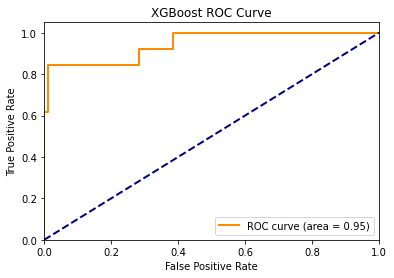

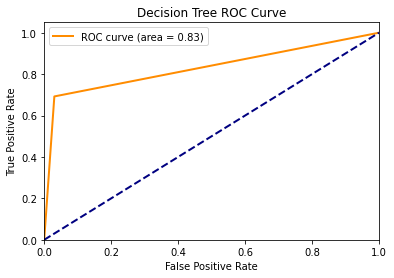

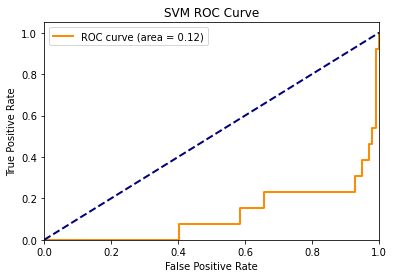

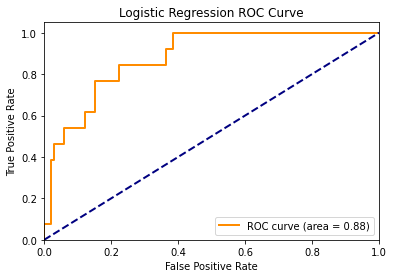

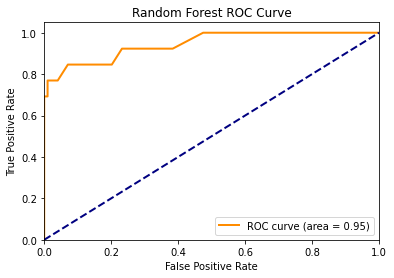

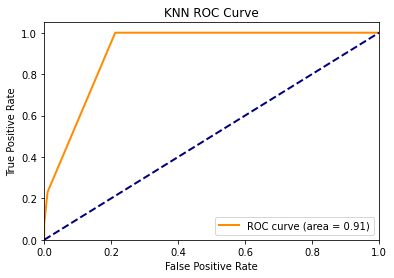

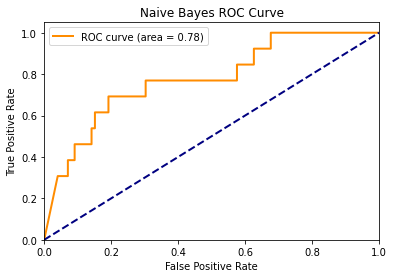

In [23]:
pred_list = [xgb_prob, dtree_prob, svc_prob, lr_prob, rfc_prob, knn_prob, nb_prob]
name_list = ['XGBoost', 'Decision Tree', 'SVM', 'Logistic Regression', 'Random Forest', 'KNN', 'Naive Bayes']
for y_pred, name in zip(pred_list, name_list):
    roc_plot(train_Y, y_pred, name)